# 1. Import Necessary Libraries

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [249]:
#converting into dataframe
df = pd.read_csv('TCC.csv')

In [250]:
df.shape

(7043, 21)

In [251]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [252]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Imputing Missing Values with Medians

In [253]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [254]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 3. EDA

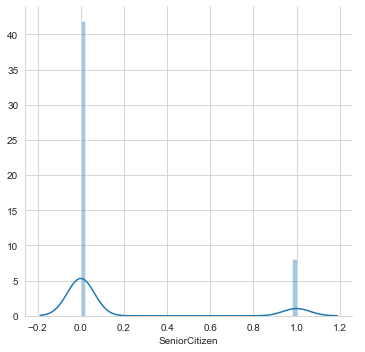

In [137]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'SeniorCitizen')\
    .add_legend();
plt.show()

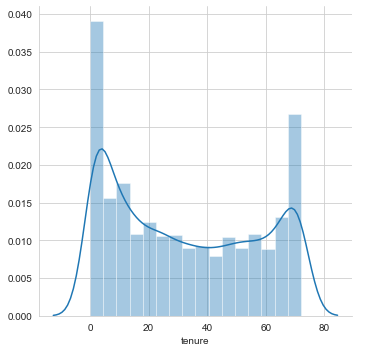

In [138]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'tenure')\
    .add_legend();
plt.show()

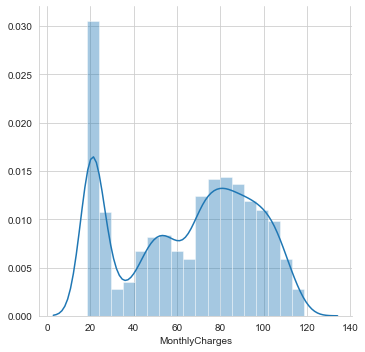

In [127]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'MonthlyCharges')\
    .add_legend();
plt.show()

In [255]:
SeniorCitizen_transformed = np.log(df['SeniorCitizen']+ 1)
df['SeniorCitizen']=SeniorCitizen_transformed

MonthlyCharges_transformed = np.log(df['MonthlyCharges']+ 1)
df['MonthlyCharges']=MonthlyCharges_transformed

tenure_transformed = np.log(df['tenure']+ 1)
df['tenure']=tenure_transformed


# 4.  Data Visualization with PCA

In [139]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['customerID']= label_encoder.fit_transform(df['customerID'])  
df['gender']= label_encoder.fit_transform(df['gender']) 
df['Partner']= label_encoder.fit_transform(df['Partner']) 
df['Dependents']= label_encoder.fit_transform(df['Dependents']) 
df['PhoneService']= label_encoder.fit_transform(df['PhoneService']) 
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines']) 
df['InternetService']= label_encoder.fit_transform(df['InternetService']) 
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity']) 
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup']) 
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection']) 
df['TechSupport']= label_encoder.fit_transform(df['TechSupport']) 
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV']) 
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies']) 
df['Contract']= label_encoder.fit_transform(df['Contract']) 
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling']) 
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod']) 
df['TotalCharges']= label_encoder.fit_transform(df['TotalCharges']) 



In [118]:
from sklearn.preprocessing import StandardScaler
features = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

x = df.loc[:, features].values

y = df.loc[:,['Churn']].values

x = StandardScaler().fit_transform(x)

In [119]:
x

array([[ 0.91189045, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.21690598,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [-0.47070074,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  1.33486261,
         0.32033821, -0.31653445],
       [-0.63694614,  0.99053183, -0.43991649, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [122]:
finalDf = pd.concat([principalDf, df[['Churn']]], axis = 1)

In [123]:
finalDf

,principal component 1,principal component 2,principal component 3,Churn
0,-2.213367,-0.124000,2.960543,No
1,-1.295510,-1.438209,0.696582,No
2,-2.537520,-0.527395,0.900670,Yes
3,0.106815,-1.870756,3.465415,No
4,-3.234424,0.348945,-0.110077,Yes
...,...,...,...,...
7038,1.868192,-0.032651,0.353968,No
7039,3.050295,1.533100,-0.607740,No
7040,-1.711359,-1.175704,3.414285,No
7041,-2.336841,1.786950,0.143517,Yes


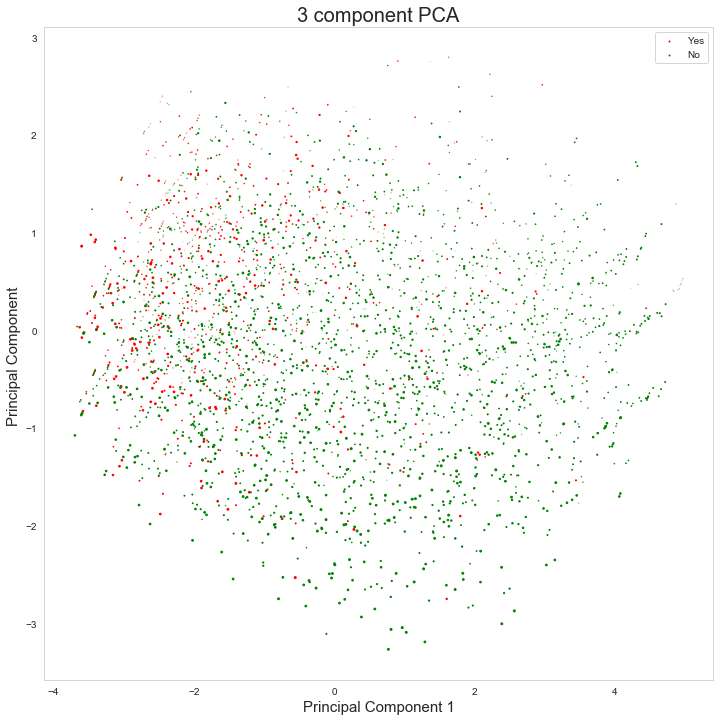

In [124]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)

targets = ['Yes','No'  ]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']

               , c = color
              )
ax.legend(targets)
ax.grid()

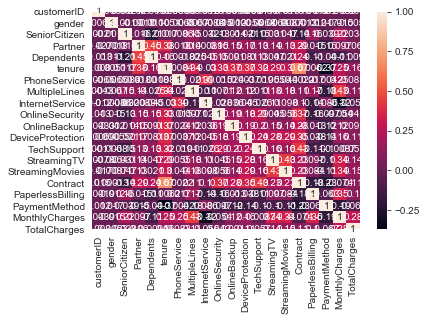

In [128]:
corr=df.corr()
sns.heatmap(corr, annot=True)

# 4.Data Pre-Processing

In [256]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['customerID']= label_encoder.fit_transform(df['customerID'])  
df['gender']= label_encoder.fit_transform(df['gender']) 
df['Partner']= label_encoder.fit_transform(df['Partner']) 
df['Dependents']= label_encoder.fit_transform(df['Dependents']) 
df['PhoneService']= label_encoder.fit_transform(df['PhoneService']) 
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines']) 
df['InternetService']= label_encoder.fit_transform(df['InternetService']) 
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity']) 
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup']) 
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection']) 
df['TechSupport']= label_encoder.fit_transform(df['TechSupport']) 
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV']) 
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies']) 
df['Contract']= label_encoder.fit_transform(df['Contract']) 
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling']) 
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod']) 
df['TotalCharges']= label_encoder.fit_transform(df['TotalCharges']) 
df['Churn']= label_encoder.fit_transform(df['Churn']) 


In [257]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

### E .Train_test Split

In [258]:
y=df['Churn']
x=df.drop(['Churn'],axis=1)


In [259]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [260]:
round(X_train, 2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5416,6327,0,0.00,1,1,4.06,1,0,1,0,2,0,0,2,2,1,1,2,4.56,4593
5408,4544,0,0.00,0,0,3.95,1,2,2,1,1,1,1,1,1,2,0,0,3.26,523
712,6807,0,0.00,0,0,4.08,1,2,2,1,1,1,1,1,1,2,1,1,3.25,936
6194,1983,0,0.00,1,1,4.23,1,2,1,0,2,0,2,0,0,1,1,0,4.44,4737
5240,6204,0,0.69,1,0,4.19,1,0,1,0,2,2,2,2,2,2,1,1,4.67,5334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157,1145,1,0.00,0,0,2.48,1,0,0,0,0,0,0,0,0,0,0,1,3.83,4171
5721,4304,0,0.00,0,0,3.33,1,0,0,2,2,0,0,0,0,2,0,0,3.99,900
5757,3934,0,0.69,1,0,3.37,1,2,2,1,1,1,1,1,1,0,0,3,3.28,5690
5936,6628,0,0.00,1,1,3.66,1,0,2,1,1,1,1,1,1,2,1,3,3.04,5808


In [261]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [262]:
from sklearn.preprocessing import Normalizer
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().fit_transform(X_test)

# 5. Building Models

# Model1 : KNN

In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [264]:
clf.best_params_

{'n_neighbors': 81}

In [265]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7174108062065742, 0.7716419403596119, 0.7810322235567051, 0.7758612633693514, 0.7779678896264117, 0.7796166054507696, 0.7803175323234812, 0.7836028333291293, 0.7847770919958841, 0.7810195535152413]


Text(0, 0.5, 'Cross-Validated Accuracy')

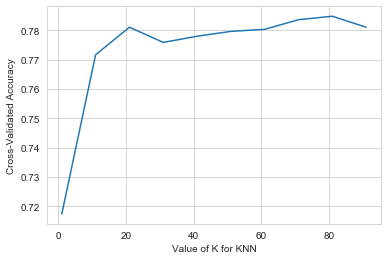

In [266]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

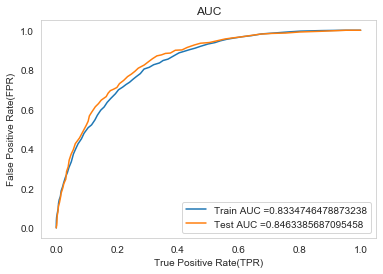

In [267]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=81)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [268]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1537
           1       0.65      0.54      0.59       563

    accuracy                           0.80      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.79      0.80      0.79      2100

0.8


## Confusion Matrix

In [269]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [270]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[876 661]
 [ 49 514]]


In [271]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

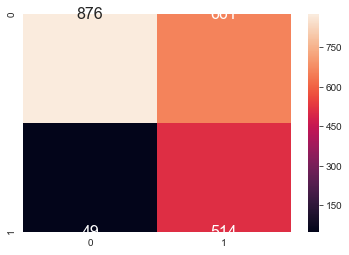

In [272]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 2 : Naive Bayes

In [237]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

parameters = {'alpha': range(1,10,1)}

clf = GridSearchCV(mnb, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'alpha': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [238]:
clf.best_params_

{'alpha': 1}

In [239]:
from sklearn.model_selection import cross_val_score
alpha = range(1,100,10)
k_scores = []


for k in alpha:
  
    mnb = MultinomialNB(alpha=k)
    
    scores = cross_val_score(mnb,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.5509681735543445, 0.5495608171691674, 0.5486234992727177, 0.5476861787892252, 0.5465119123613426, 0.5460435282864011, 0.5453393003472458, 0.5451062103899516, 0.5446383760615768, 0.5434663137940469]


Text(0, 0.5, 'Cross-Validated Accuracy')

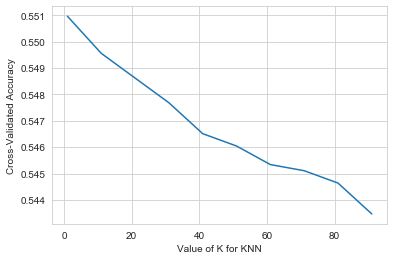

In [240]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(alpha, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

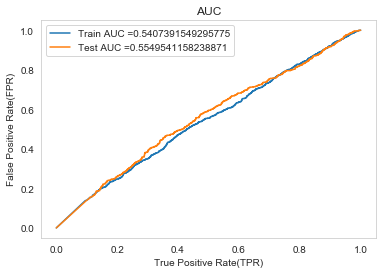

In [241]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

y_train_pred = mnb.predict_proba(X_train)  
y_test_pred = mnb.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [242]:
y_pred=mnb.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.56      0.65      1537
           1       0.30      0.52      0.39       563

    accuracy                           0.55      2100
   macro avg       0.53      0.54      0.52      2100
weighted avg       0.64      0.55      0.58      2100

0.5528571428571428


## Confusion Matrix

In [243]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [244]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[1046  491]
 [ 333  230]]


In [245]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

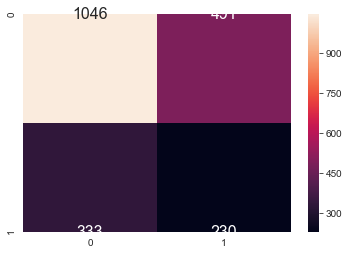

In [246]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Logistic Regression 

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8459690140845071


In [275]:
model.best_params_

{'C': 100}

In [276]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.733397034084934, 0.7535733552714551, 0.7979348220470364, 0.7976940175285075, 0.7974587234108605]


In [277]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

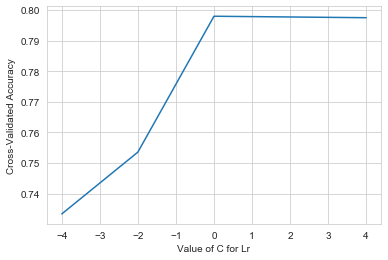

In [278]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

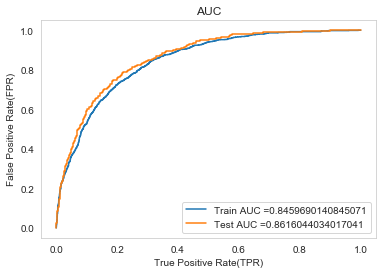

In [279]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=100)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [280]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1537
           1       0.69      0.57      0.62       563

    accuracy                           0.82      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.81      0.82      0.81      2100

0.8152380952380952


## Confusion Matrix

In [166]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [167]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[1327  210]
 [ 209  354]]


In [168]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

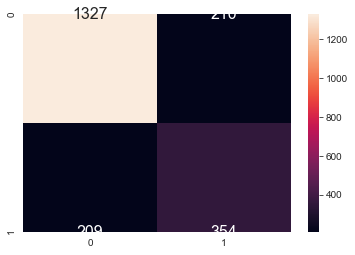

In [169]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 4 : SVM

In [282]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8391247887323944


In [283]:
model.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [284]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.733397034084934, 0.733397034084934, 0.733397034084934, 0.733397034084934, 0.7904180777367517]


In [285]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

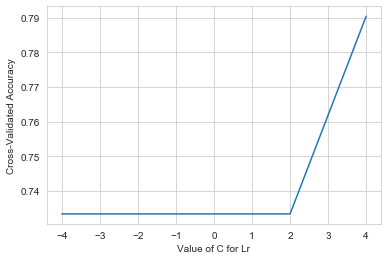

In [286]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

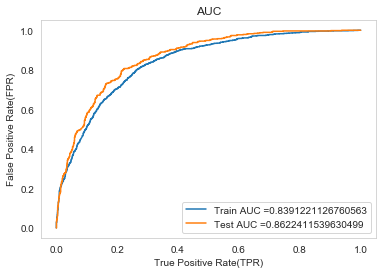

In [287]:
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=0.0001,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [288]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1537
           1       0.73      0.48      0.58       563

    accuracy                           0.81      2100
   macro avg       0.78      0.71      0.73      2100
weighted avg       0.80      0.81      0.80      2100

0.8114285714285714


## Confusion Matrix

In [290]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [291]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[1333  204]
 [ 191  372]]


In [292]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

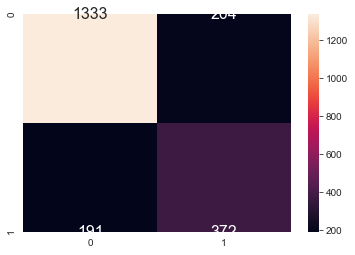

In [293]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [294]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [295]:
model.best_params_

{'max_depth': 5, 'min_samples_split': 500}

In [184]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.733397034084934, 0.780553918173134, 0.7760954657549928, 0.7760954657549928]


Text(0, 0.5, 'Cross-Validated Accuracy')

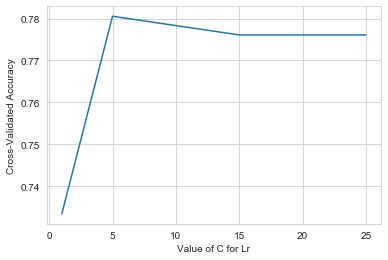

In [185]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

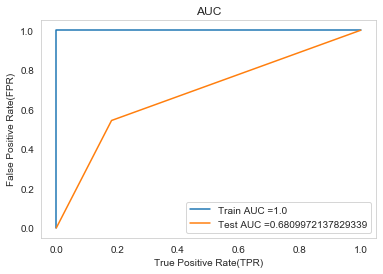

In [186]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

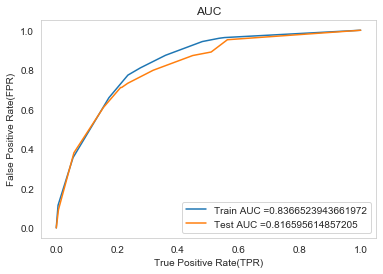

In [296]:
DT = DecisionTreeClassifier(max_depth=5,min_samples_split=500)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [188]:
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1537
           1       0.70      0.38      0.49       563

    accuracy                           0.79      2100
   macro avg       0.75      0.66      0.68      2100
weighted avg       0.78      0.79      0.77      2100

0.7904761904761904


## Confusion Matrix

In [189]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [190]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[771 766]
 [ 31 532]]


In [191]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

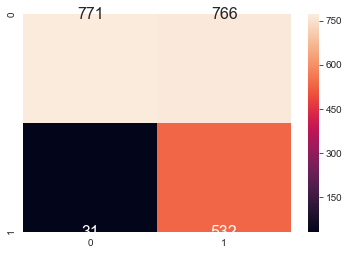

In [192]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 6 : Ensemble Techniques 

## A. Bagging

In [194]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8618184507042254


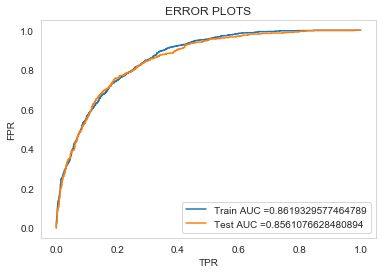

In [201]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=5,n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [202]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1537
           1       0.53      0.80      0.64       563

    accuracy                           0.76      2100
   macro avg       0.72      0.77      0.73      2100
weighted avg       0.81      0.76      0.77      2100

0.7561904761904762


## Confusion Matrix

In [203]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

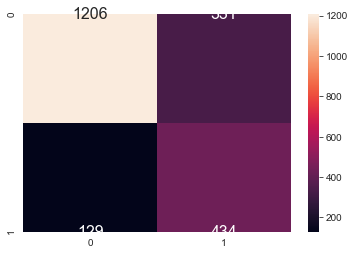

In [204]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [199]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.853869790866154


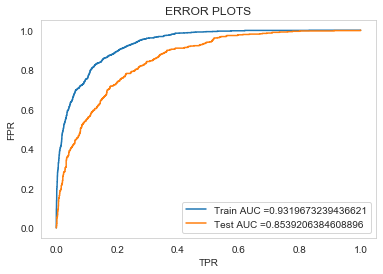

In [205]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=50)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [206]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1537
           1       0.67      0.55      0.60       563

    accuracy                           0.81      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.80      0.81      0.80      2100

0.8057142857142857


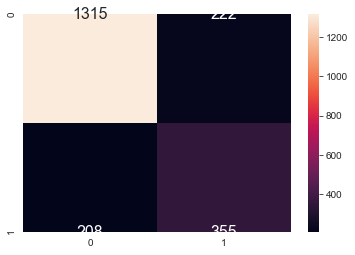

In [207]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [298]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [299]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.632
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.523
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.436
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.410
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.407
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.407


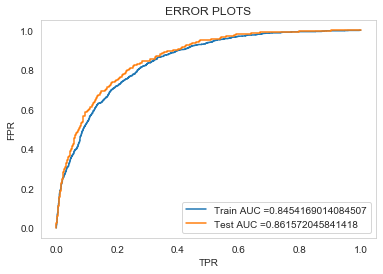

In [300]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

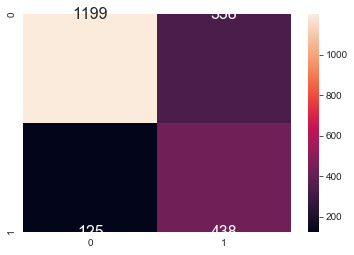

In [301]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[18:40:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


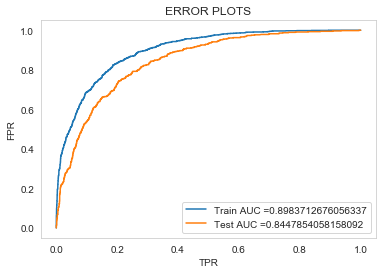

In [302]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [303]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "Accuracy", "AUC"]

#setting row values
table.add_row(['1',"KNN", '80.00','84.63' ])
table.add_row(['2',"Naive Bayes",'70.10' ,'72.18' ])
table.add_row(['3',"Logistic Regression", '81.52','86.16' ])
table.add_row(['4',"SVM", '81.42','86.62' ])
table.add_row(['5',"Decision Tree",'79.04' ,'83.69' ])
table.add_row(['6',"RandomForest",'75.61' ,'85.61' ])
table.add_row(['7',"GBDT",'80.57' ,'85.39' ])
table.add_row(['8',"Xgboost",'--' ,'84.48' ])
table.add_row(['9',"Stacking", '--','86.17' ])
print(table)

+-------+---------------------+----------+-------+
| Sr.No |        Model        | Accuracy |  AUC  |
+-------+---------------------+----------+-------+
|   1   |         KNN         |  80.00   | 84.63 |
|   2   |     Naive Bayes     |  70.10   | 72.18 |
|   3   | Logistic Regression |  81.52   | 86.16 |
|   4   |         SVM         |  81.42   | 86.62 |
|   5   |    Decision Tree    |  79.04   | 83.69 |
|   6   |     RandomForest    |  75.61   | 85.61 |
|   7   |         GBDT        |  80.57   | 85.39 |
|   8   |       Xgboost       |    --    | 84.48 |
|   9   |       Stacking      |    --    | 86.17 |
+-------+---------------------+----------+-------+


Summary:<br>
1.SVM is the best model amongst all with AUC of 86.62<br>
2.As the data is imbalanced the accuracy score is affected.<br>

# 7.Creating Submission File

In [304]:
best_model=SVC
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']